-------

                                               INNOVATIVE ASSIGNMENT
                                            TITANIC SURVIVAL PREDICTION 

-------

ROLL NO.s : 21BCE216, 21BCE224, 21BCE237

NAMEs : SHREYA PATEL, VRUSHIKA PATEL, PRISHA SHAH

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import missingno
from collections import Counter
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

## Load the dataset

In [2]:
train_data = pd.read_csv("C:\\Users\\PATEL SHREYA\\Downloads\\train.csv")
test_data = pd.read_csv("C:\\Users\\PATEL SHREYA\\Downloads\\test.csv")

In [3]:
print(train_data.shape)
print(test_data.shape)

(891, 12)
(418, 11)


In [4]:
print(train_data.head(10))

   PassengerId  Survived  Pclass   
0            1         0       3  \
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp   
0                            Braund, Mr. Owen Harris    male  22.0      1  \
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54

In [5]:
print(test_data.head(10))

   PassengerId  Pclass                                          Name     Sex   
0          892       3                              Kelly, Mr. James    male  \
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   
5          897       3                    Svensson, Mr. Johan Cervin    male   
6          898       3                          Connolly, Miss. Kate  female   
7          899       2                  Caldwell, Mr. Albert Francis    male   
8          900       3     Abrahim, Mrs. Joseph (Sophie Halaut Easu)  female   
9          901       3                       Davies, Mr. John Samuel    male   

    Age  SibSp  Parch     Ticket     Fare Cabin Embarked  
0  34.5      0      0     330911   7.8292   NaN        Q  
1

In [6]:
features = train_data.columns
print(features)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [7]:
features = test_data.columns
print(features)

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [8]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [9]:
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB
None


# Data Preprocessing and visualisation

### 1. Drop unecessary columns

In [10]:
drop_columns = ['Name' , 'Ticket' , 'Cabin']
train_data.drop(drop_columns , axis = 1 , inplace=True)
test_data.drop(drop_columns , axis = 1 , inplace=True)

In [11]:
print(train_data.columns)
print(test_data.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')


In [12]:
print(train_data)

     PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare   
0              1         0       3    male  22.0      1      0   7.2500  \
1              2         1       1  female  38.0      1      0  71.2833   
2              3         1       3  female  26.0      0      0   7.9250   
3              4         1       1  female  35.0      1      0  53.1000   
4              5         0       3    male  35.0      0      0   8.0500   
..           ...       ...     ...     ...   ...    ...    ...      ...   
886          887         0       2    male  27.0      0      0  13.0000   
887          888         1       1  female  19.0      0      0  30.0000   
888          889         0       3  female   NaN      1      2  23.4500   
889          890         1       1    male  26.0      0      0  30.0000   
890          891         0       3    male  32.0      0      0   7.7500   

    Embarked  
0          S  
1          C  
2          S  
3          S  
4          S  
..       

In [13]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB
None


In [14]:
print(test_data)

     PassengerId  Pclass     Sex   Age  SibSp  Parch      Fare Embarked
0            892       3    male  34.5      0      0    7.8292        Q
1            893       3  female  47.0      1      0    7.0000        S
2            894       2    male  62.0      0      0    9.6875        Q
3            895       3    male  27.0      0      0    8.6625        S
4            896       3  female  22.0      1      1   12.2875        S
..           ...     ...     ...   ...    ...    ...       ...      ...
413         1305       3    male   NaN      0      0    8.0500        S
414         1306       1  female  39.0      0      0  108.9000        C
415         1307       3    male  38.5      0      0    7.2500        S
416         1308       3    male   NaN      0      0    8.0500        S
417         1309       3    male   NaN      1      1   22.3583        C

[418 rows x 8 columns]


In [15]:
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          332 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.3+ KB
None


### 2.Handling Missing values

In [16]:
train_data = train_data.fillna(train_data['Age'].mean())
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [17]:
train_data['Age'] = np.round(train_data['Age'])

In [18]:
print(train_data)

     PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare   
0              1         0       3    male  22.0      1      0   7.2500  \
1              2         1       1  female  38.0      1      0  71.2833   
2              3         1       3  female  26.0      0      0   7.9250   
3              4         1       1  female  35.0      1      0  53.1000   
4              5         0       3    male  35.0      0      0   8.0500   
..           ...       ...     ...     ...   ...    ...    ...      ...   
886          887         0       2    male  27.0      0      0  13.0000   
887          888         1       1  female  19.0      0      0  30.0000   
888          889         0       3  female  30.0      1      2  23.4500   
889          890         1       1    male  26.0      0      0  30.0000   
890          891         0       3    male  32.0      0      0   7.7500   

    Embarked  
0          S  
1          C  
2          S  
3          S  
4          S  
..       

In [19]:
print(train_data.isnull().sum().sort_values(ascending = False))

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


In [20]:
print(test_data.isnull().sum().sort_values(ascending = False))

Age            86
Fare            1
PassengerId     0
Pclass          0
Sex             0
SibSp           0
Parch           0
Embarked        0
dtype: int64


Axes(0.125,0.11;0.698618x0.77)


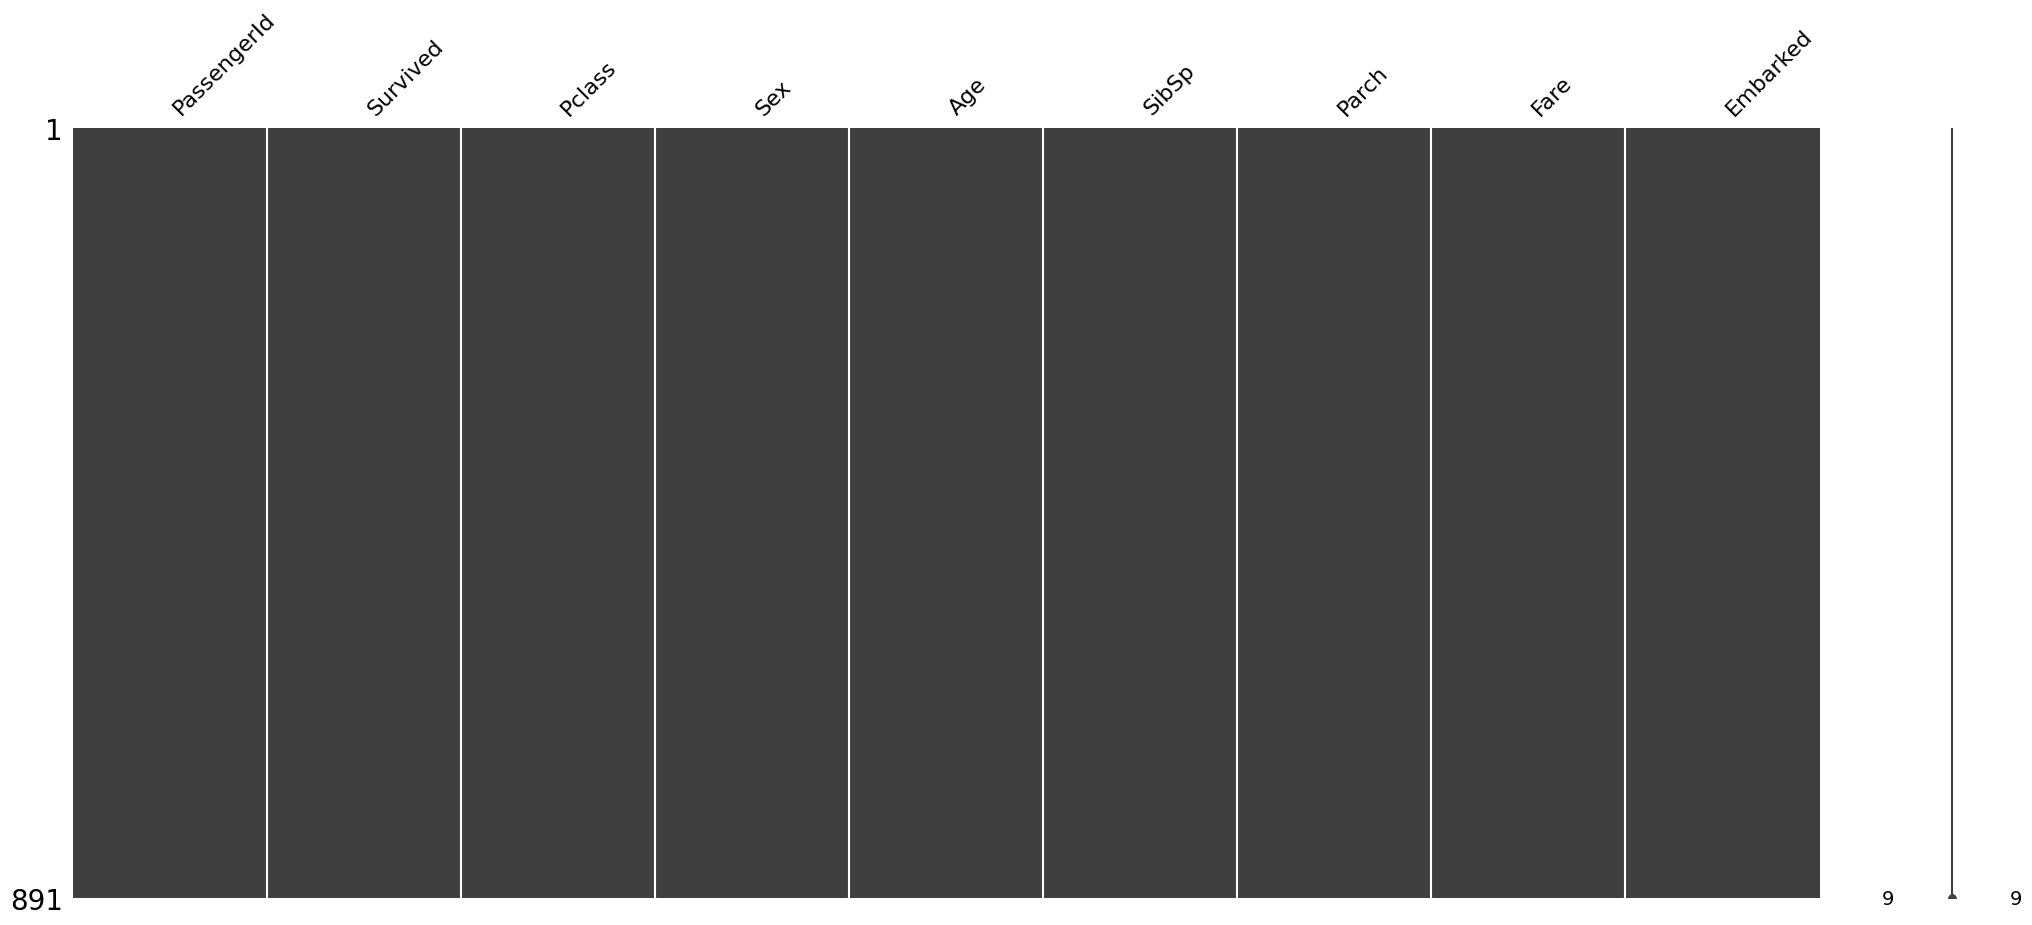

In [21]:
print(missingno.matrix(train_data))

Axes(0.125,0.11;0.698618x0.77)


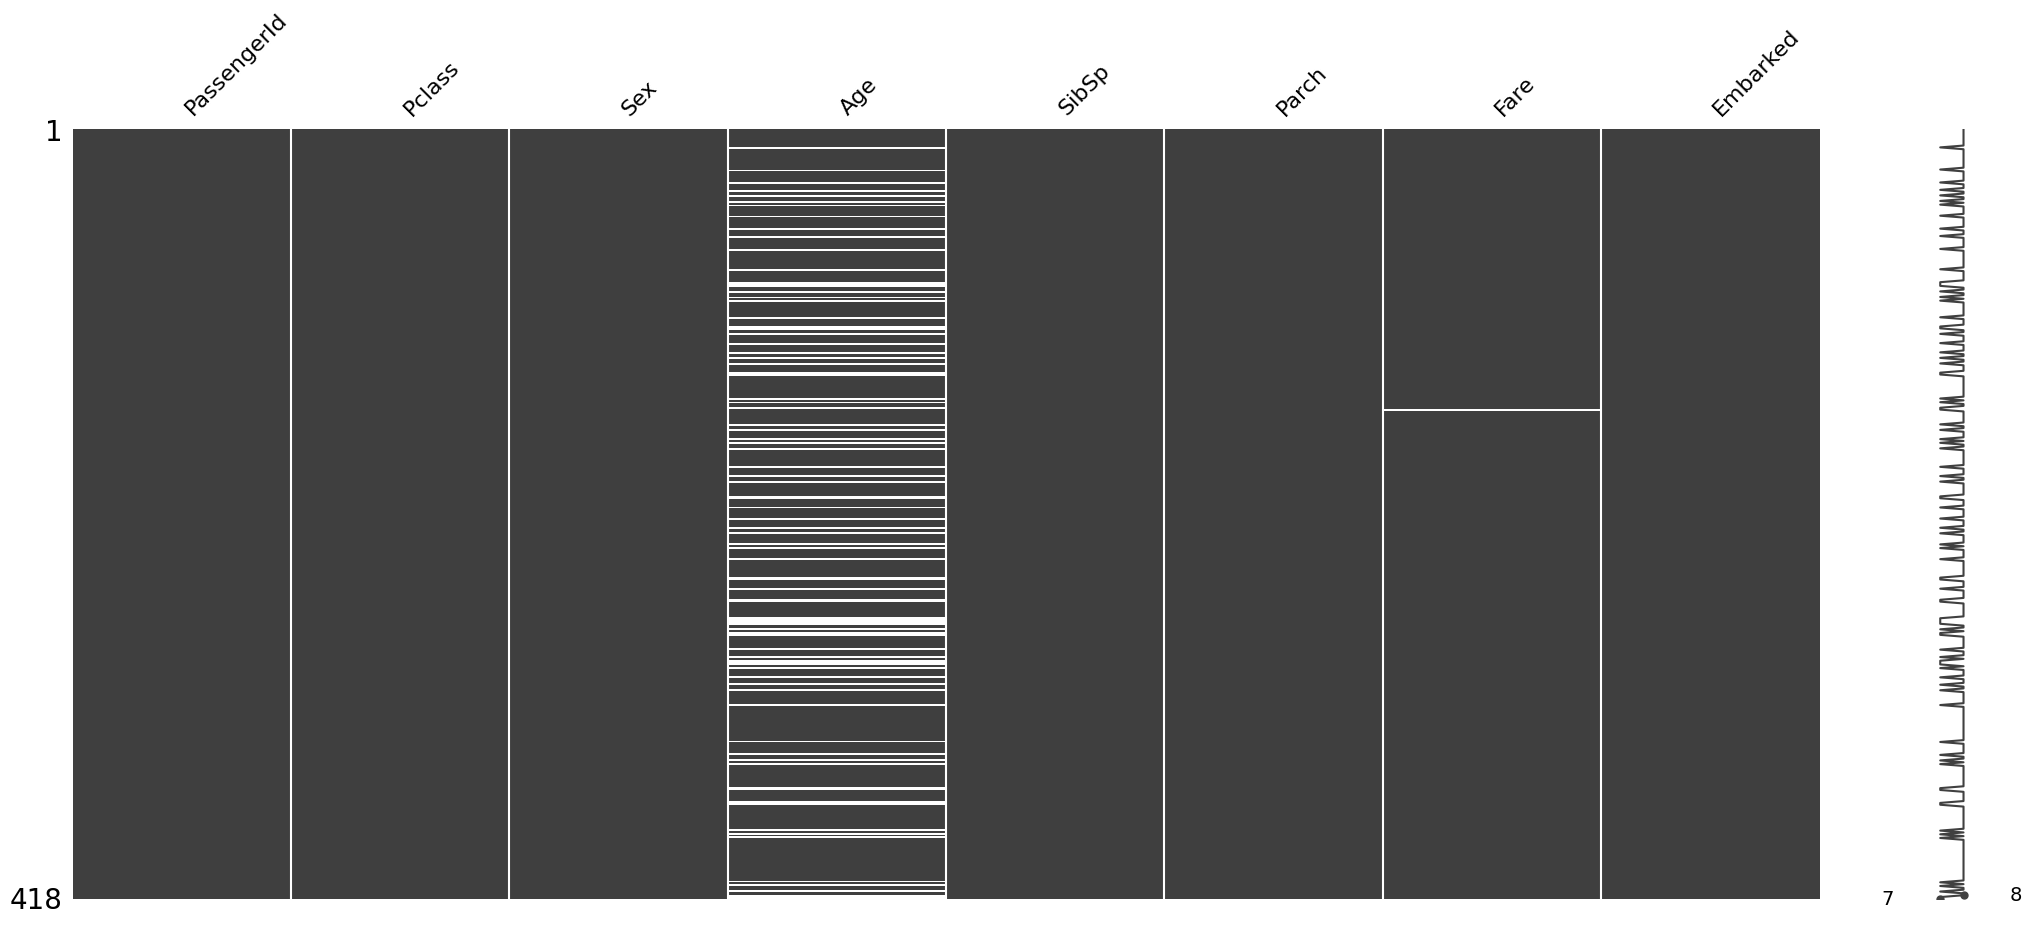

In [22]:
print(missingno.matrix(test_data))

In [23]:
print(train_data.describe())

       PassengerId    Survived      Pclass         Age       SibSp   
count   891.000000  891.000000  891.000000  891.000000  891.000000  \
mean    446.000000    0.383838    2.308642   29.754209    0.523008   
std     257.353842    0.486592    0.836071   13.000828    1.102743   
min       1.000000    0.000000    1.000000    0.000000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   30.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [24]:
print(test_data.describe())

       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200


In [25]:
test_data = test_data.fillna(np.round(test_data['Age'].mean()))
test_data['Age'] = np.round(test_data['Age'])
print(test_data)

     PassengerId  Pclass     Sex   Age  SibSp  Parch      Fare Embarked
0            892       3    male  34.0      0      0    7.8292        Q
1            893       3  female  47.0      1      0    7.0000        S
2            894       2    male  62.0      0      0    9.6875        Q
3            895       3    male  27.0      0      0    8.6625        S
4            896       3  female  22.0      1      1   12.2875        S
..           ...     ...     ...   ...    ...    ...       ...      ...
413         1305       3    male  30.0      0      0    8.0500        S
414         1306       1  female  39.0      0      0  108.9000        C
415         1307       3    male  38.0      0      0    7.2500        S
416         1308       3    male  30.0      0      0    8.0500        S
417         1309       3    male  30.0      1      1   22.3583        C

[418 rows x 8 columns]


In [26]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.3+ KB


### 3.Use Label Encoder to change categorical data into numerical

#### Categorical variable: Sex

In [27]:
print(train_data['Sex'].value_counts(dropna = False))

Sex
male      577
female    314
Name: count, dtype: int64


Axes(0.125,0.11;0.775x0.77)


Text(0.5, 0, 'nonSurvival           survival')

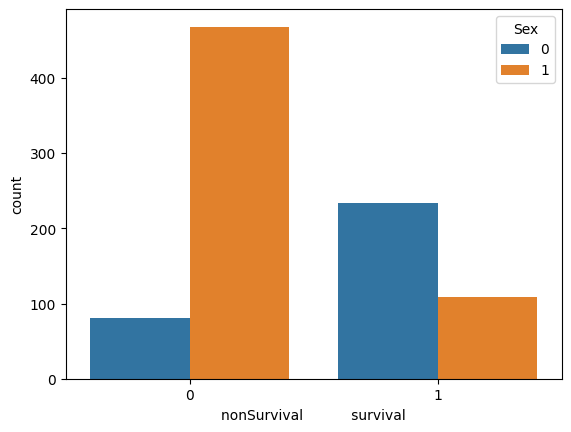

In [95]:
print(sns.countplot(data = train_data , x = 'Survived' , hue = 'Sex'))
plt.xlabel('nonSurvival           survival')

In [29]:
print(train_data[['Sex', 'Survived']].groupby('Sex', as_index = False).mean().sort_values(by = 'Survived', ascending = False))

      Sex  Survived
0  female  0.742038
1    male  0.188908


Text(0.5, 1.0, 'Survival Probability by Gender')


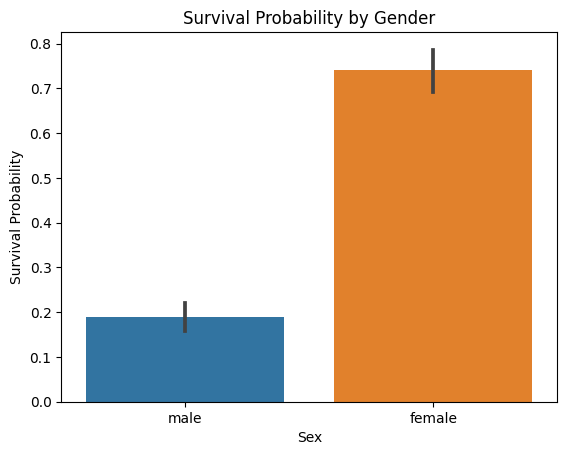

In [30]:
sns.barplot(x = 'Sex', y ='Survived', data = train_data)
plt.ylabel('Survival Probability')
print(plt.title('Survival Probability by Gender'))


In [31]:
la = LabelEncoder()
la.fit(train_data['Sex'])
train_data['Sex'] = la.fit_transform(train_data['Sex'])
#male 0 and female 1

In [32]:
print(train_data.head(5))

   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare Embarked
0            1         0       3    1  22.0      1      0   7.2500        S
1            2         1       1    0  38.0      1      0  71.2833        C
2            3         1       3    0  26.0      0      0   7.9250        S
3            4         1       1    0  35.0      1      0  53.1000        S
4            5         0       3    1  35.0      0      0   8.0500        S


In [33]:
la.fit(test_data['Sex'])
test_data['Sex'] = la.fit_transform(test_data['Sex'])

In [34]:
print(test_data.head(5))

   PassengerId  Pclass  Sex   Age  SibSp  Parch     Fare Embarked
0          892       3    1  34.0      0      0   7.8292        Q
1          893       3    0  47.0      1      0   7.0000        S
2          894       2    1  62.0      0      0   9.6875        Q
3          895       3    1  27.0      0      0   8.6625        S
4          896       3    0  22.0      1      1  12.2875        S


#### Categorical variable: Pclass

In [35]:
print(train_data['Pclass'].value_counts(dropna = False))

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


Axes(0.125,0.11;0.775x0.77)


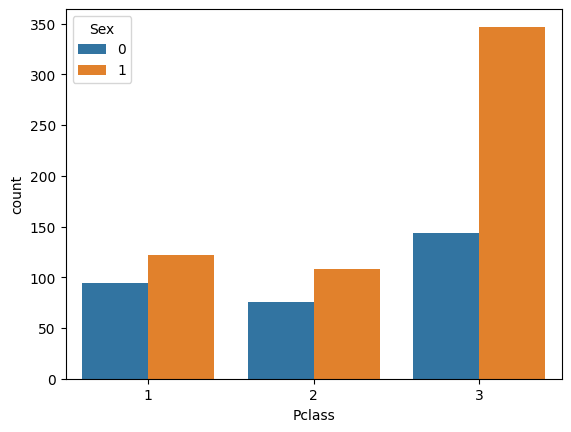

In [36]:
print(sns.countplot(data=train_data , x = 'Pclass', hue = 'Sex'))

In [37]:
print(train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by = 'Survived', ascending = False))

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


Text(0.5, 1.0, 'Survival Probability by Passenger Class')


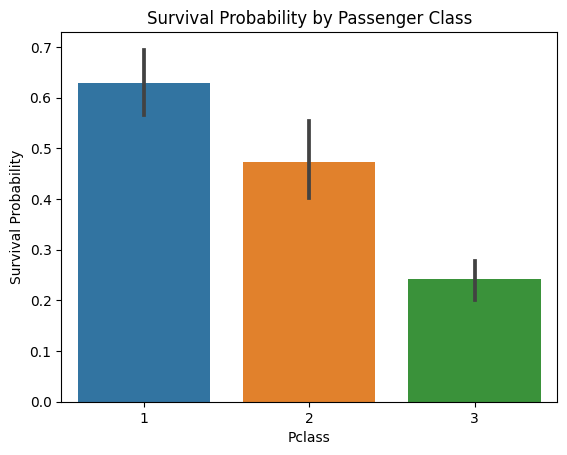

In [38]:
sns.barplot(x = 'Pclass', y ='Survived', data = train_data)
plt.ylabel('Survival Probability')
print(plt.title('Survival Probability by Passenger Class'))


Axes(0.125,0.11;0.775x0.77)


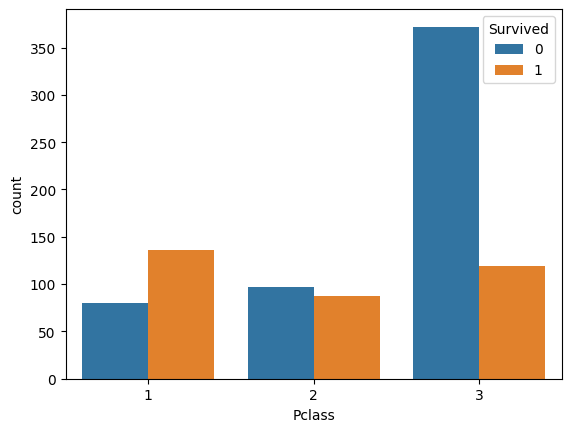

In [39]:
print(sns.countplot(data = train_data , x = 'Pclass' , hue='Survived'))

Text(0.5, 0.98, 'Survival Probability by Sex and Passenger Class')


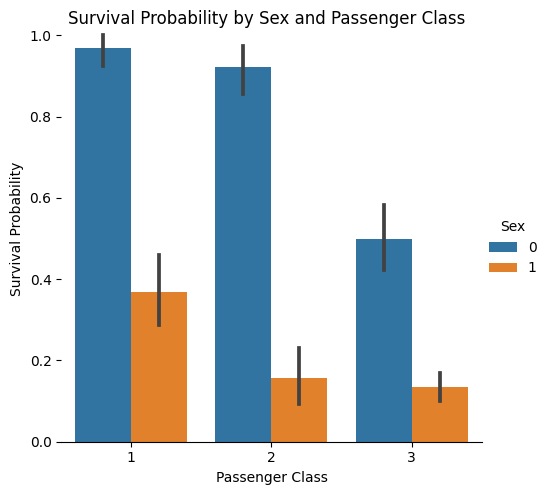

In [97]:
g = sns.catplot(x='Pclass', y='Survived', hue='Sex', data=train_data, kind='bar')
g.despine(left=True)
g.set_axis_labels('Passenger Class', 'Survival Probability')
print(g.fig.suptitle('Survival Probability by Sex and Passenger Class'))


#### Categorical variable: Embarked

In [41]:
print(train_data['Embarked'].value_counts(dropna = False))

Embarked
S    644
C    170
Q     77
Name: count, dtype: int64


In [42]:
print(train_data[['Embarked', 'Survived']].groupby(['Embarked'], as_index = False).mean().sort_values(by = 'Survived', ascending = False))

  Embarked  Survived
0        C  0.558824
1        Q  0.389610
2        S  0.336957


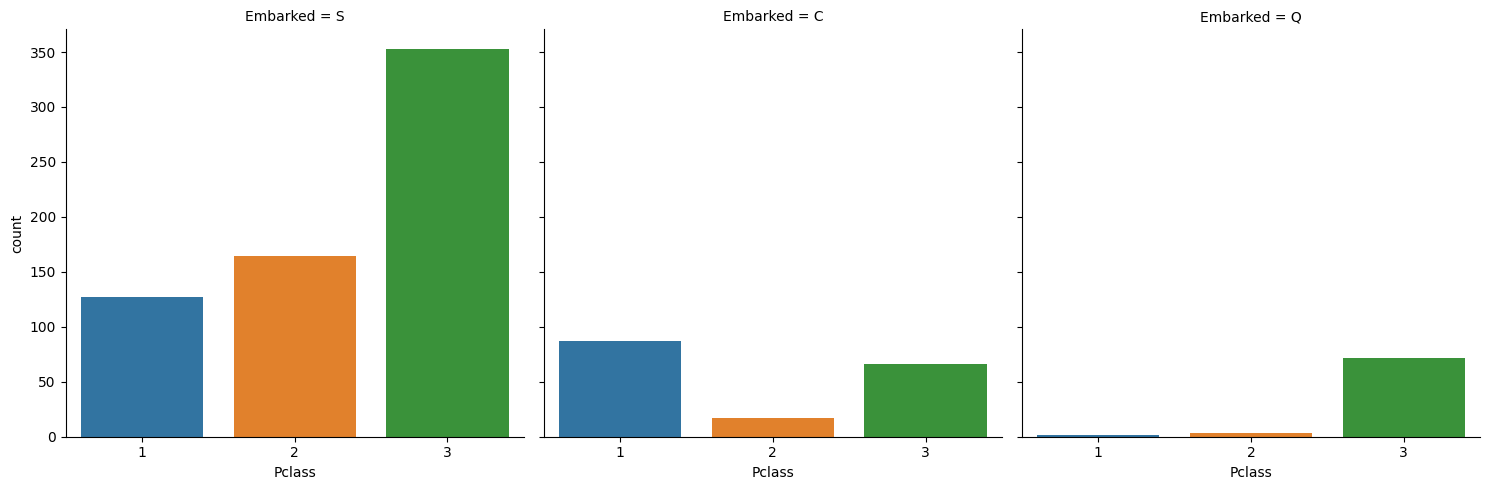

In [43]:
print(sns.catplot(x='Pclass', col='Embarked', data=train_data, kind='count'))

Text(0.5, 1.0, 'Survival Probability by Point of Embarkation')


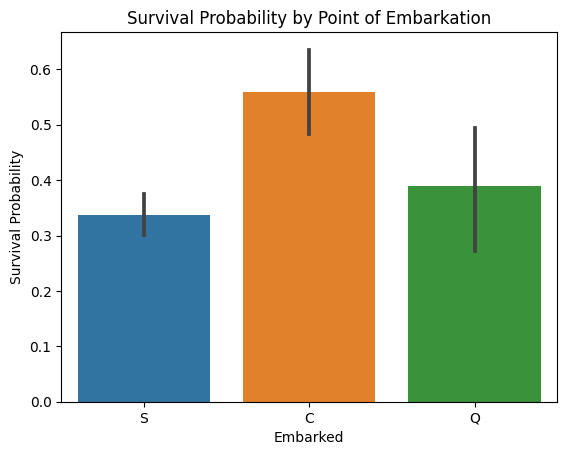

In [44]:
sns.barplot(x = 'Embarked', y ='Survived', data = train_data)
plt.ylabel('Survival Probability')
print(plt.title('Survival Probability by Point of Embarkation'))

C:\Users\PATEL SHREYA\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\PATEL SHREYA\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:717: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


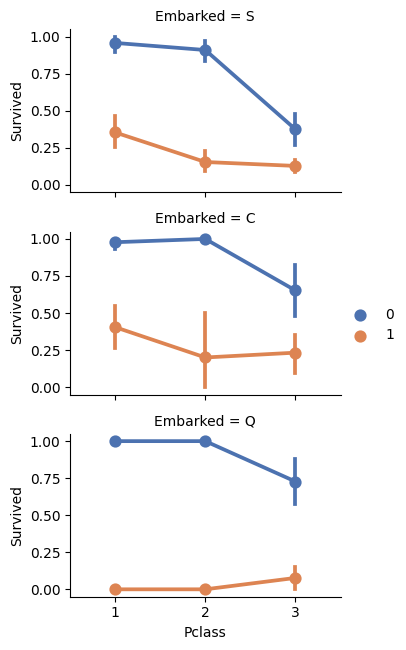

In [45]:
grid = sns.FacetGrid(train_data, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

In [46]:
la = LabelEncoder()
la.fit(train_data['Embarked'])
train_data['Embarked'] = la.fit_transform(train_data['Embarked'])

In [47]:
print(train_data.head(5))

   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0            1         0       3    1  22.0      1      0   7.2500         2
1            2         1       1    0  38.0      1      0  71.2833         0
2            3         1       3    0  26.0      0      0   7.9250         2
3            4         1       1    0  35.0      1      0  53.1000         2
4            5         0       3    1  35.0      0      0   8.0500         2


In [48]:
la = LabelEncoder()
la.fit(test_data['Embarked'])
test_data['Embarked'] = la.fit_transform(test_data['Embarked'])

In [49]:
print(test_data.head(5))

   PassengerId  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0          892       3    1  34.0      0      0   7.8292         1
1          893       3    0  47.0      1      0   7.0000         2
2          894       2    1  62.0      0      0   9.6875         1
3          895       3    1  27.0      0      0   8.6625         2
4          896       3    0  22.0      1      1  12.2875         2


## Numerical variables correlation with survival

### Numerical variable: SibSp

In [50]:
train_data['SibSp'].value_counts(dropna = False)

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [51]:
train_data[['SibSp', 'Survived']].groupby('SibSp', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


Text(0.5, 1.0, 'Survival Probability by SibSp')


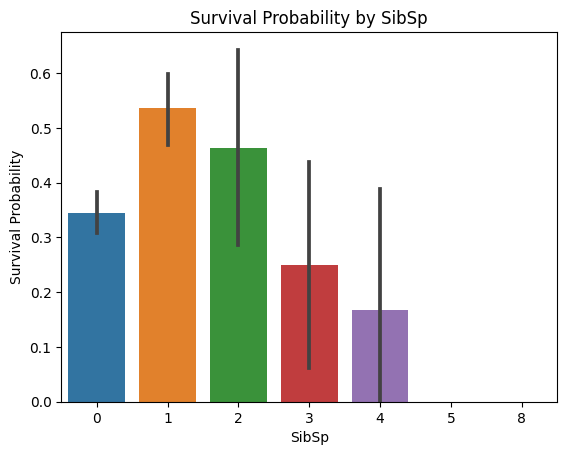

In [52]:
sns.barplot(x = 'SibSp', y ='Survived', data = train_data)
(plt.ylabel('Survival Probability'))
print(plt.title('Survival Probability by SibSp'))

### Numerical variable: Parch

In [53]:
print(train_data['Parch'].value_counts(dropna = False))

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


In [54]:
print(train_data[['Parch', 'Survived']].groupby('Parch', as_index = False).mean().sort_values(by = 'Survived', ascending = False))

   Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000


Text(0.5, 1.0, 'Survival Probability by Parch')

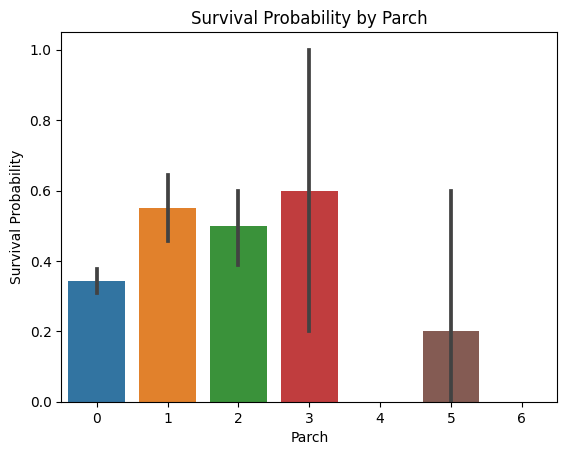

In [55]:
sns.barplot(x = 'Parch', y ='Survived', data = train_data)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Parch')

### Numerical variable: Age

In [56]:
print(train_data['Age'].isnull().sum())

0


C:\Users\PATEL SHREYA\AppData\Local\Temp\ipykernel_27908\2658278732.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['Age'], label = 'Skewness: %.2f'%(train_data['Age'].skew()))


Text(0.5, 1.0, 'Passenger Age Distribution')


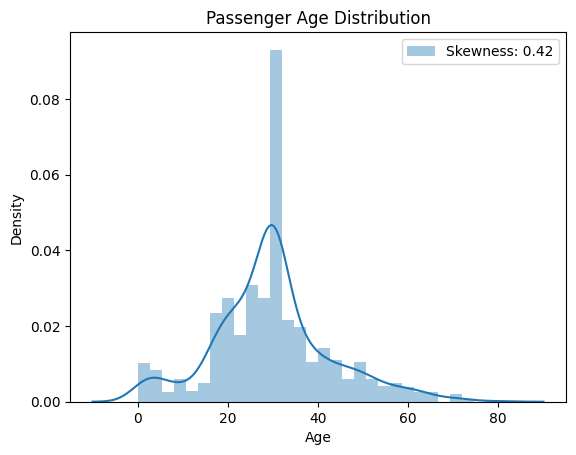

In [57]:
sns.distplot(train_data['Age'], label = 'Skewness: %.2f'%(train_data['Age'].skew()))
plt.legend(loc = 'best')
print(plt.title('Passenger Age Distribution'))

C:\Users\PATEL SHREYA\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\PATEL SHREYA\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad637275

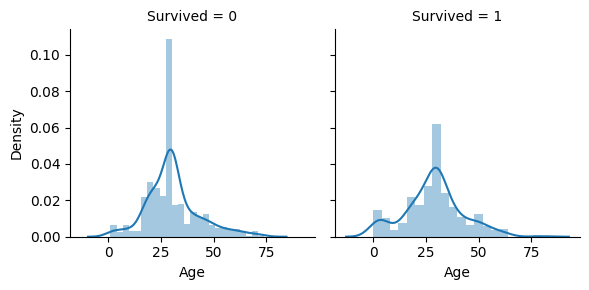

In [58]:
g = sns.FacetGrid(train_data, col = 'Survived')
print(g.map(sns.distplot, 'Age'))

Text(0.5, 1.0, 'Passenger Age Distribution by Survival')


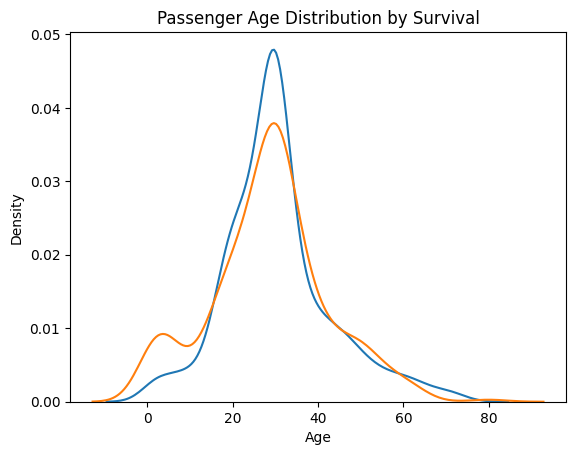

In [59]:
sns.kdeplot(train_data['Age'][train_data['Survived'] == 0], label = 'Did not survive')
sns.kdeplot(train_data['Age'][train_data['Survived'] == 1], label = 'Survived')
plt.xlabel('Age')
print(plt.title('Passenger Age Distribution by Survival'))

### Numerical variable: Fare

In [60]:
print(train_data['Fare'].isnull().sum())

0


C:\Users\PATEL SHREYA\AppData\Local\Temp\ipykernel_27908\1704042394.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['Fare'], label = 'Skewness: %.2f'%(train_data['Fare'].skew()))


Text(0, 0.5, 'Passenger Fare Distribution')

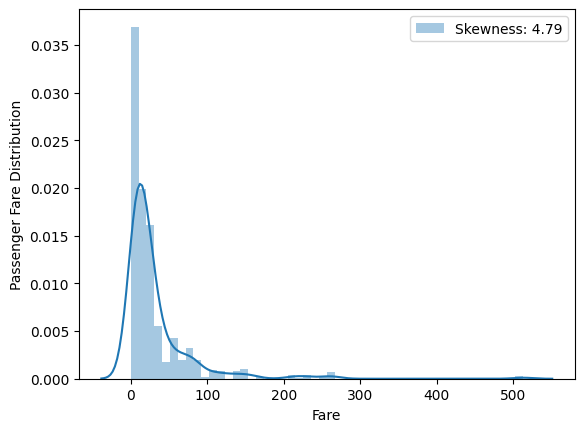

In [61]:
sns.distplot(train_data['Fare'], label = 'Skewness: %.2f'%(train_data['Fare'].skew()))
plt.legend(loc = 'best')
plt.ylabel('Passenger Fare Distribution')

In [62]:
# Missing values in test set

test_data.isnull().sum().sort_values(ascending = False)

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [63]:
combine = pd.concat([train_data, test_data], axis = 0).reset_index(drop = True)
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.0,1,0,7.2500,2
1,2,1.0,1,0,38.0,1,0,71.2833,0
2,3,1.0,3,0,26.0,0,0,7.9250,2
3,4,1.0,1,0,35.0,1,0,53.1000,2
4,5,0.0,3,1,35.0,0,0,8.0500,2


In [64]:
combine.isnull().sum().sort_values(ascending = False)

Survived       418
PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

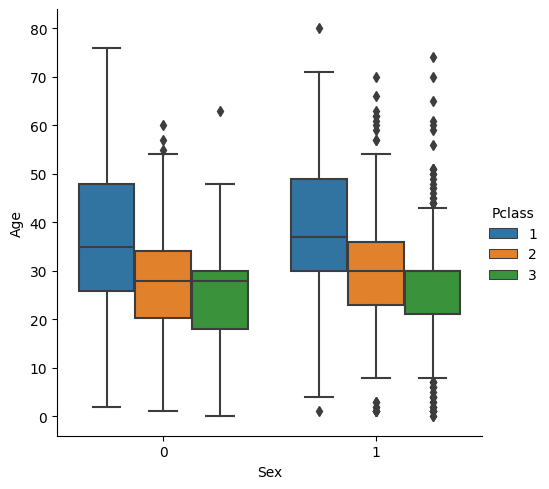

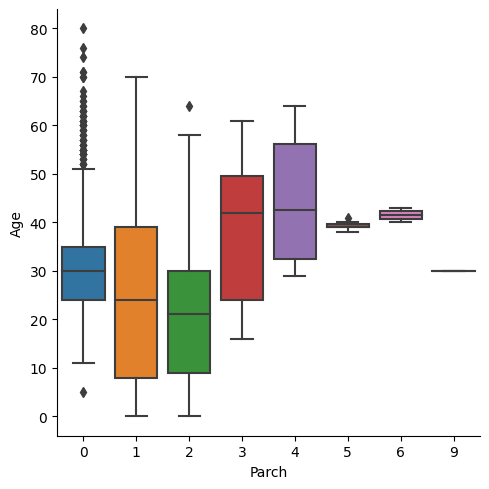

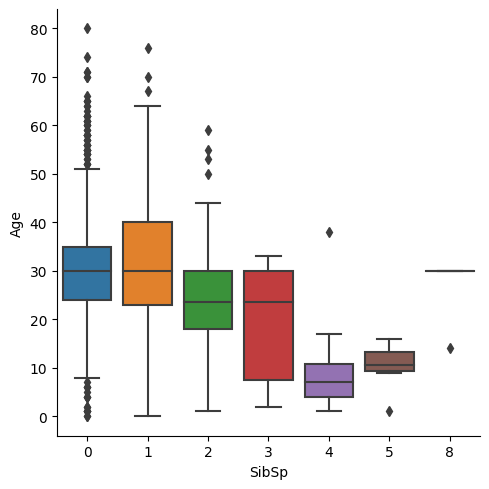

In [65]:
sns.catplot(y='Age', x='Sex', hue='Pclass', kind='box', data=combine)
sns.catplot(y='Age', x='Parch', kind='box', data=combine)
sns.catplot(y='Age', x='SibSp', kind='box', data=combine)

C:\Users\PATEL SHREYA\AppData\Local\Temp\ipykernel_27908\3232700509.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(combine['Fare'], label = 'Skewness: %.2f'%(combine['Fare'].skew()))


Text(0.5, 1.0, 'Passenger Fare Distribution')

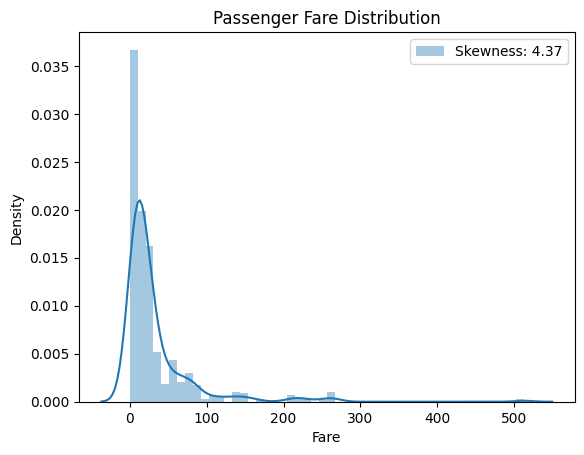

In [66]:
sns.distplot(combine['Fare'], label = 'Skewness: %.2f'%(combine['Fare'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Fare Distribution')

In [67]:
combine['Fare'] = combine['Fare'].map(lambda x: np.log(x) if x > 0 else 0)

C:\Users\PATEL SHREYA\AppData\Local\Temp\ipykernel_27908\3272952445.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(combine['Fare'], label = 'Skewness: %.2f'%(combine['Fare'].skew()))


Text(0.5, 1.0, 'Passenger Fare Distribution After Log Transformation')

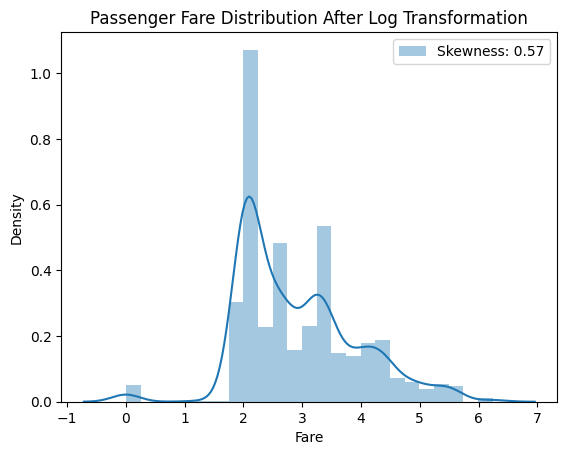

In [68]:
sns.distplot(combine['Fare'], label = 'Skewness: %.2f'%(combine['Fare'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Fare Distribution After Log Transformation')

In [69]:
combine['FamilySize'] = combine['SibSp'] + combine['Parch'] + 1
combine[['SibSp', 'Parch', 'FamilySize']].head(10)

,SibSp,Parch,FamilySize
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1
5,0,0,1
6,0,0,1
7,3,1,5
8,0,2,3
9,1,0,2


In [70]:
# Mean of survival by family size

combine[['FamilySize', 'Survived']].groupby('FamilySize', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [71]:
combine['IsAlone'] = 0
combine.loc[combine['FamilySize'] == 1, 'IsAlone'] = 1

In [72]:
# Mean of survival by IsAlone

combine[['IsAlone', 'Survived']].groupby('IsAlone', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [73]:
# Drop SibSp, Parch and FamilySize features from combine dataframe

combine = combine.drop(['SibSp', 'Parch', 'FamilySize'], axis = 1)
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,1,0.0,3,1,22.0,1.981001,2,0
1,2,1.0,1,0,38.0,4.266662,0,0
2,3,1.0,3,0,26.0,2.070022,2,1
3,4,1.0,1,0,35.0,3.972177,2,0
4,5,0.0,3,1,35.0,2.085672,2,1


# Visualise the data

In [74]:
corr = train_data.corr()

Axes(0.125,0.11;0.62x0.77)


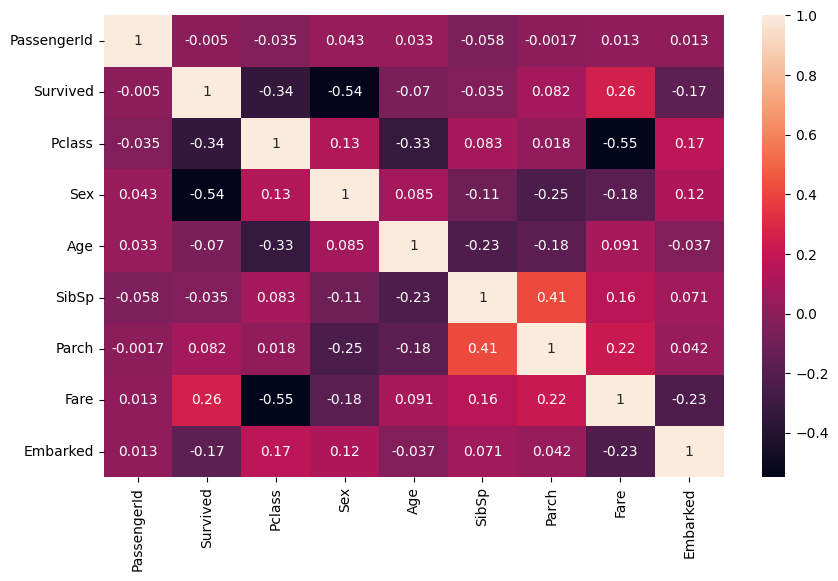

In [75]:
plt.figure(figsize = (10 , 6))
print(sns.heatmap(corr , annot = True))

In [76]:
corr = test_data.corr()

Axes(0.125,0.11;0.62x0.77)


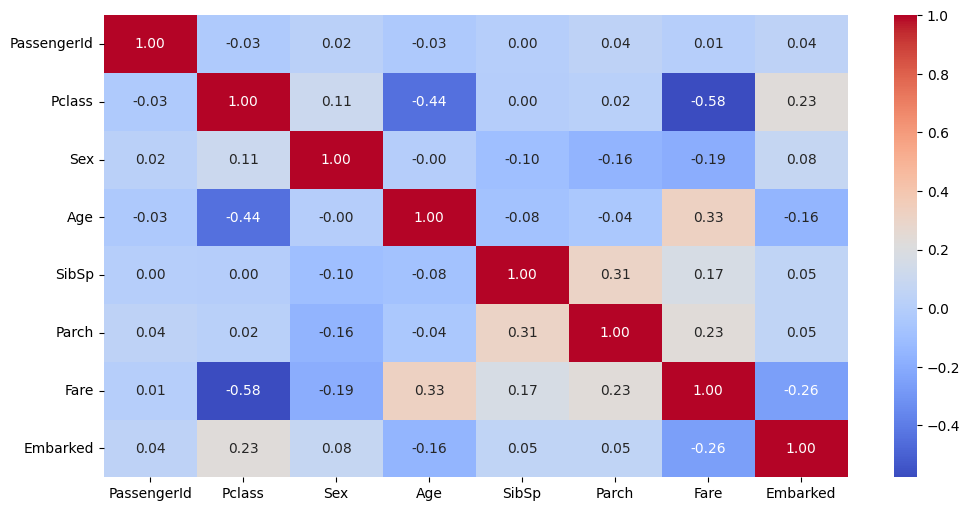

In [77]:
plt.figure(figsize = (12 , 6))
print(sns.heatmap(corr , annot = True,fmt = '.2f', cmap = 'coolwarm'))

[[<Axes: title={'center': 'PassengerId'}>
  <Axes: title={'center': 'Survived'}> <Axes: title={'center': 'Pclass'}>]
 [<Axes: title={'center': 'Sex'}> <Axes: title={'center': 'Age'}>
  <Axes: title={'center': 'SibSp'}>]
 [<Axes: title={'center': 'Parch'}> <Axes: title={'center': 'Fare'}>
  <Axes: title={'center': 'Embarked'}>]]


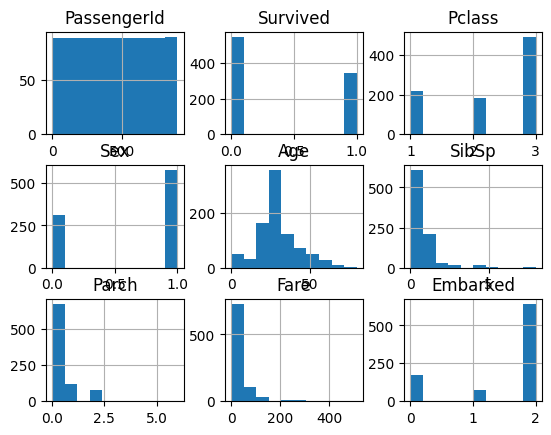

In [78]:
print(train_data.hist())

Axes(0.125,0.11;0.775x0.77)


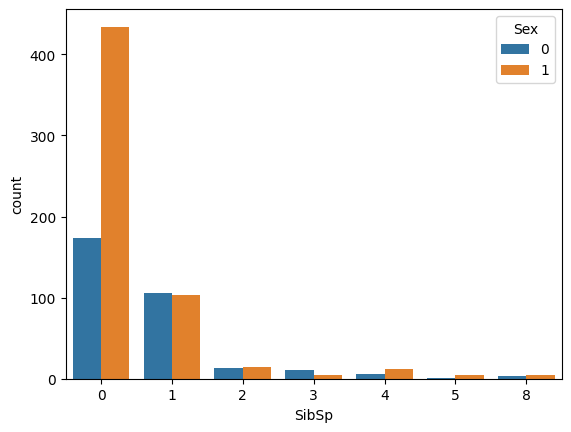

In [79]:
print(sns.countplot(data = train_data , x='SibSp' , hue='Sex'))

(array([ 50.,  33., 163., 359., 123.,  74.,  49.,  27.,  11.,   2.]), array([ 0.,  8., 16., 24., 32., 40., 48., 56., 64., 72., 80.]), <BarContainer object of 10 artists>)


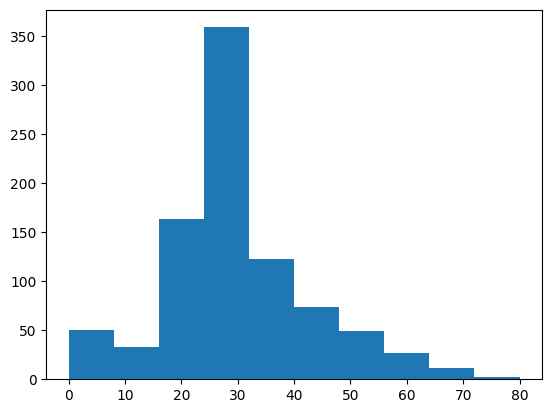

In [80]:

print(plt.hist(x = 'Age' , data = train_data))

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]), array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
       307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]), <BarContainer object of 10 artists>)


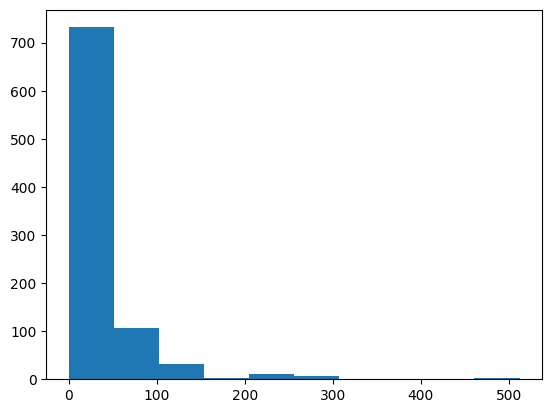

In [81]:
print(plt.hist(x = 'Fare' , data = train_data))

Axes(0.125,0.11;0.775x0.77)


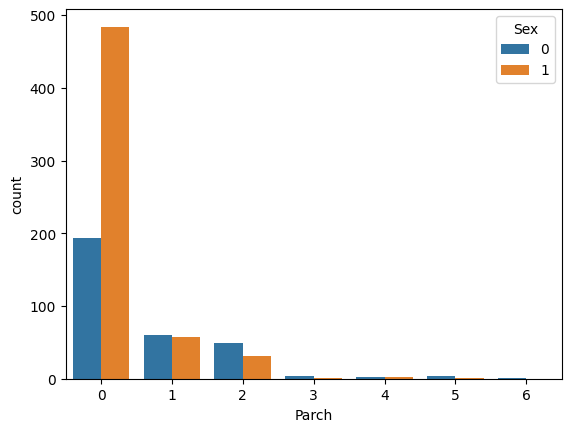

In [82]:
print(sns.countplot(data = train_data , x = 'Parch' , hue='Sex'))

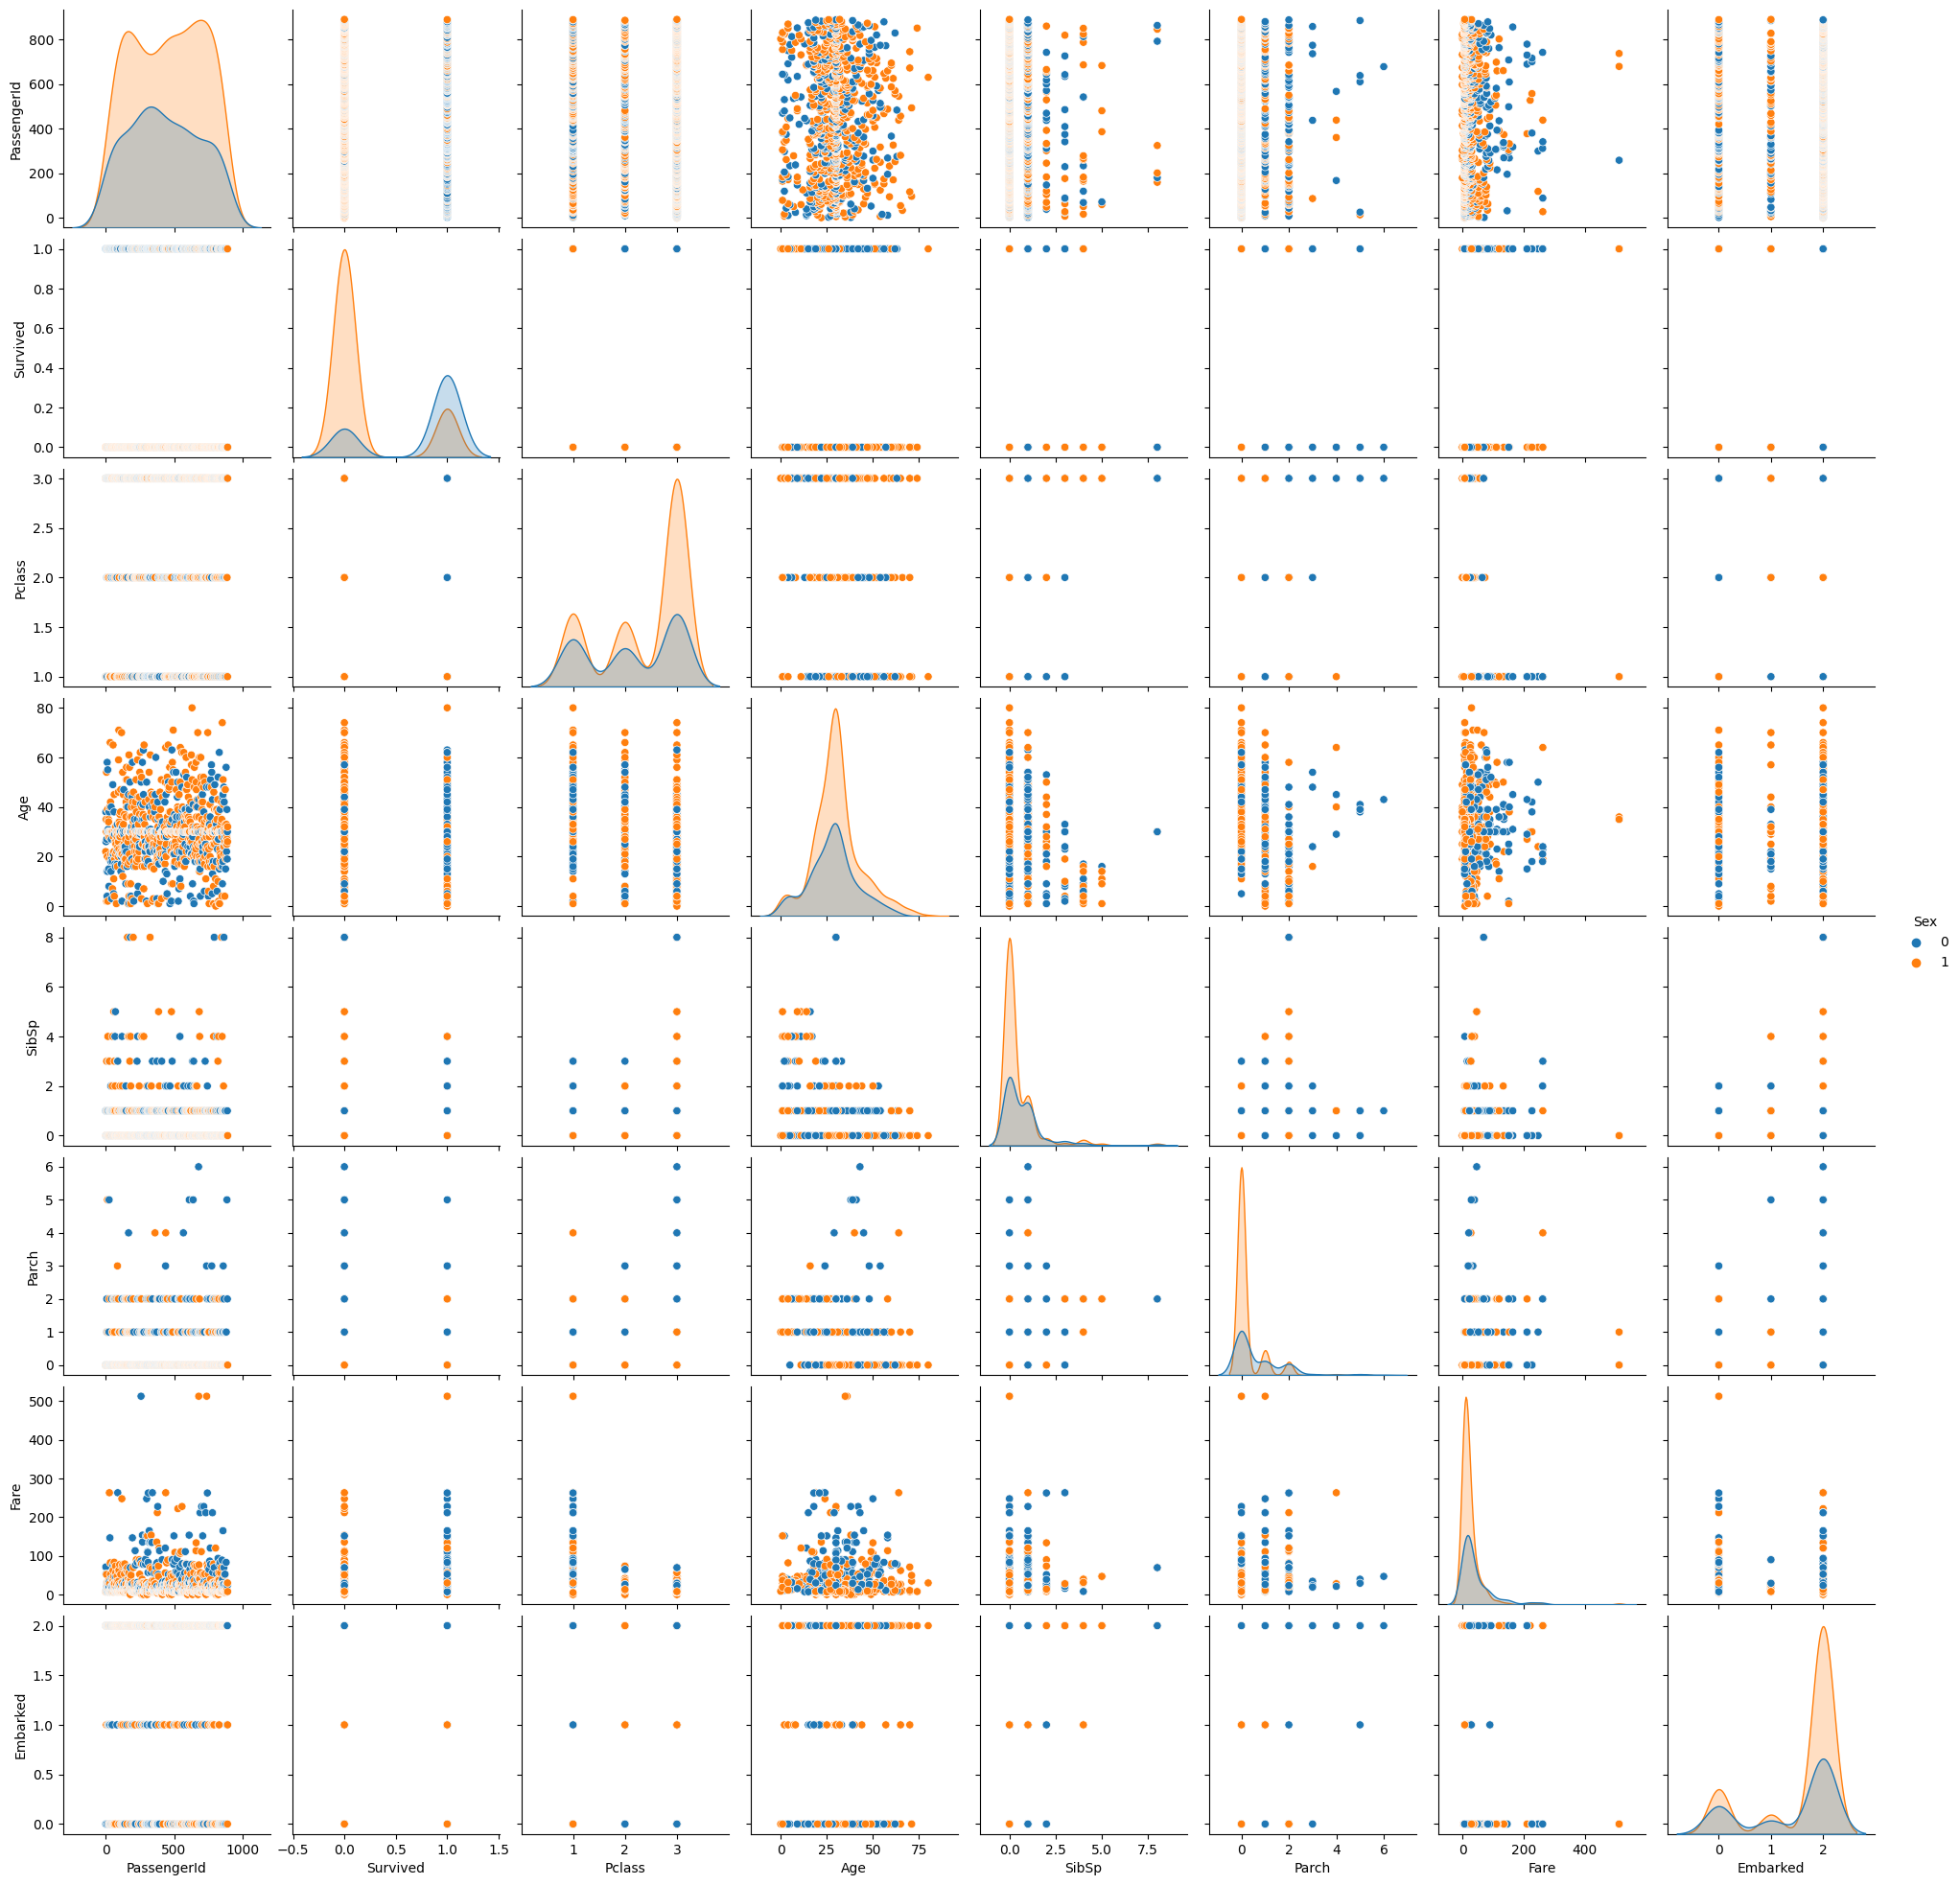

In [83]:
print(sns.pairplot(train_data , hue= 'Sex'))

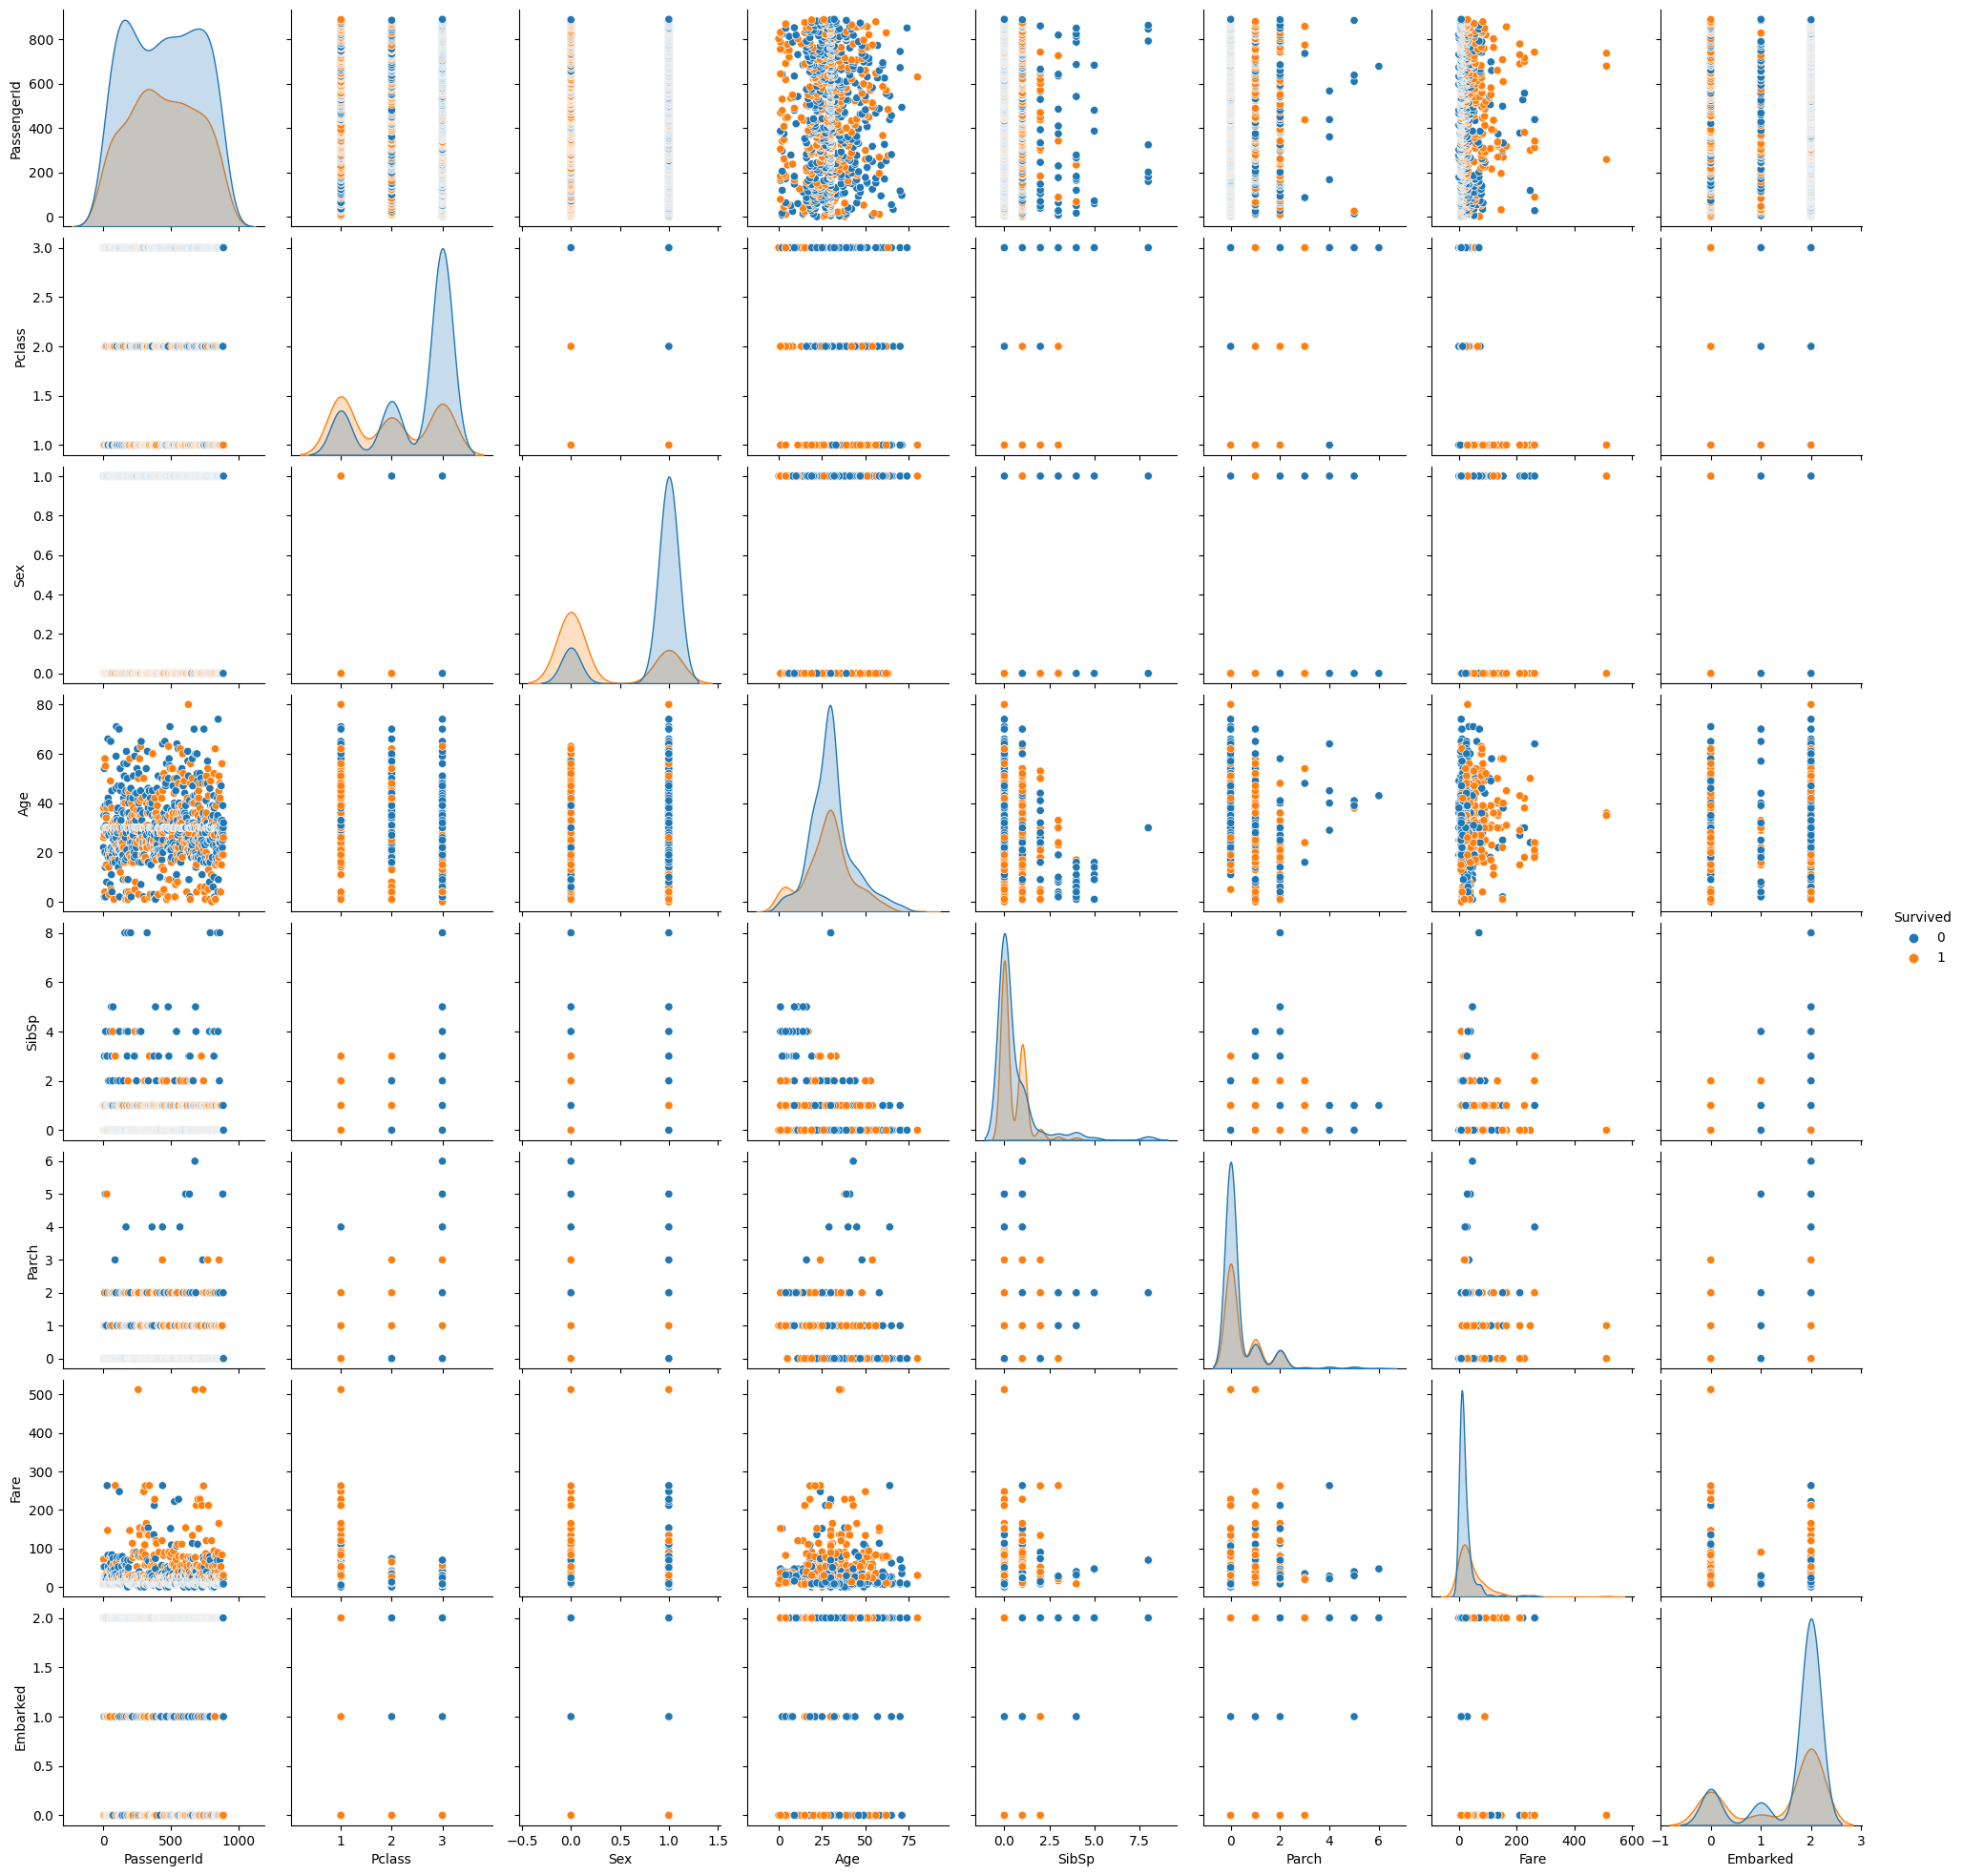

In [84]:
print(sns.pairplot(train_data , hue= 'Survived'))

In [85]:
x_train = train_data.drop(['Survived'] , axis =1)
y_train = train_data['Survived']

In [86]:
x_test = test_data

In [87]:
print(x_train.shape, y_train.shape)
print(x_test.shape)

(891, 8) (891,)
(418, 8)


# Write Algorithm to classify suviver in test_data

##### A decision tree is a flowchart-like tree structure where an internal node represents a feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome.



In [88]:
sk_tree = DecisionTreeClassifier(criterion='entropy' , max_depth=5)

In [89]:
print(sk_tree.fit(x_train , y_train))

DecisionTreeClassifier(criterion='entropy', max_depth=5)


In [90]:
y_pred = sk_tree.predict(x_test)
print(y_pred)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [91]:
model_score = sk_tree.score(x_train , y_train)
print(model_score)

0.8417508417508418
